<a href="https://colab.research.google.com/github/enbasto/api-comic/blob/main/Copia_de_Copia_de_Modelo_mediciones_LiDAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anillos

In [ ]:
#Librerias__________________________________________________________________________________________________________________

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math
import random

In [ ]:
#variables___________________________________________________________________________________________________________________

phi = np.array([107,104.17,101.33,98.5,95.67,93.85,90,87])       # Angulos verticales
phi_lidar = 90 - phi
x = []; y = []; z = []
n_data = 360 #número de datos
alpha = 0*np.pi/180.0 # angulo de inclinación del pilotScan

In [ ]:
#Funciones___________________________________________________________________________________________________________________

def radians(phi,n_data):
    phi = phi*np.pi/180.0
    theta=np.linspace(0,2*np.pi,n_data)
    return phi,theta

def proyeccion_campo_angulos(phi,theta,alpha):
    tZ = 2; tY = 0; tX = 0                                           # proyeccion de altura del lidar con respecto al campo
    X_ = []; Y_ = []
    df=np.empty([n_data*len(phi),5])  # x,y,z,ring, P
    counter=0
    for ring in range(0,len(phi)):
        for ang_hor in range(0,len(theta)):
            P = (-tZ) / (np.cos(alpha)*np.cos(phi[ring]) - np.sin(alpha)*np.sin(phi[ring])*np.cos(theta[ang_hor]))
            if(P >= 0):                                                               # Limitador para el infinito
                x = np.cos(alpha)*(P*np.sin(phi[ring])*np.cos(theta[ang_hor])) + np.sin(alpha)*P*np.cos(phi[ring]) + tX
                y = P*np.sin(phi[ring])*np.sin(theta[ang_hor]) + tY
                z = np.cos(alpha)*P*np.cos(phi[ring]) - np.sin(alpha)*P*np.sin(phi[ring])*np.cos(theta[ang_hor]) + tZ
            df[counter,0]=x
            df[counter,1]=y
            df[counter,2]=z
            df[counter,3]=ring
            df[counter,4]=P
            counter=counter+1
        #print("Con el anillo ",ring, " : ", np.degrees(phi[ring]))
    fig,ax = plt.subplots()
    ax.set_title("3d meassure plane",fontsize=14,fontweight="bold")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim(-45,45)
    ax.set_ylim(-45,45)
    #ax.plot(X_,Y_,'.')
    for ring in range(0,len(phi)):
        positions=np.where(df[:,3]==ring)
        leyenda="Anillo="+str(phi_lidar[ring])
        ax.plot(df[positions,0].T,df[positions,1].T,'.',label=leyenda)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return df

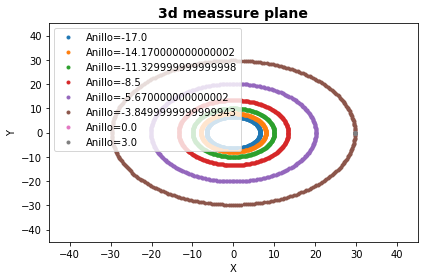

In [ ]:
if __name__ == "__main__":
    phi,theta = radians(phi, n_data)
    df = proyeccion_campo_angulos(phi,theta,alpha)

# Mapeo en campo dada la trayectoria en este.

Se hará una representación de campos de cultivos 

<center> 

Campo de cultivo de limón


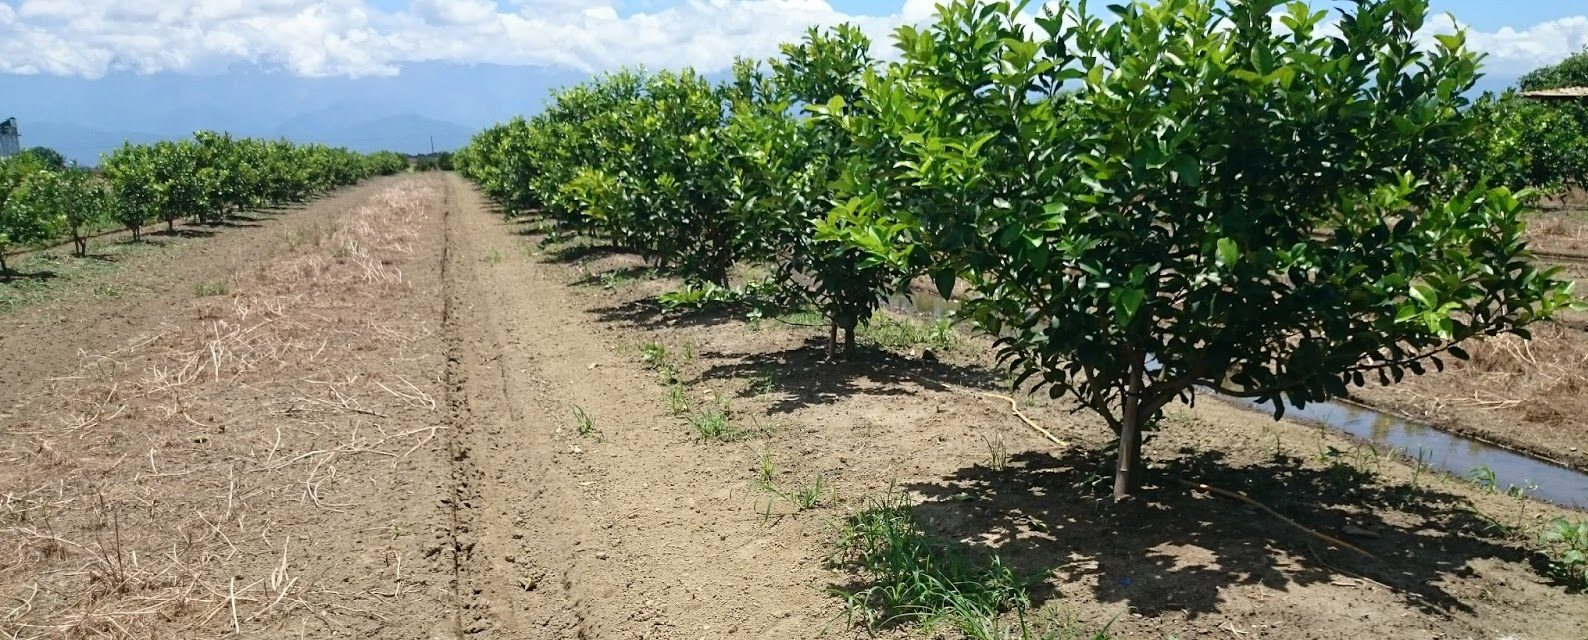

Para este caso tendremos en cuenta las dimensiones del campo, el numero de arboles por linea y los surcos.

<center>

###Representación de campo de cultivo.

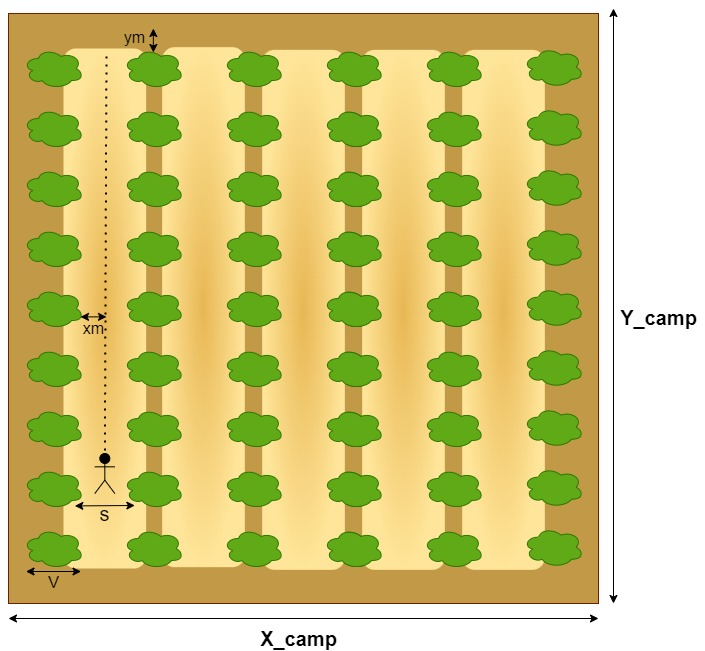

Donde **X_camp** y **Y_camp** representan las dimensiones del campo; **v** es la medida de los arboles o vegetación, **s** es la medida de los surcos y **xm** y **ym** son los limites o la distancia de respeto entre la vegetación o cultivos y el trayecto del LiDAR.

## Campo

In [ ]:
def graficacampo(x,y,figsize1):
  plt.figure(figsize=figsize1)
  # Campo______________________________
  plt.vlines(0,0,y,'brown')    #lineas verticales vlines(x,ymin,ymax,'azul')
  plt.hlines(y,0,x,'brown')    #lineas horizontales inferiores
  plt.vlines(x,y,0,'brown')    #lineas verticales vlines(x,ymin,ymax,'azul')
  plt.hlines(0,x,0,'brown')    #lineas horizontales inferiores

def graficav(x1,x2,y1,y2):
  # Campo______________________________
  plt.vlines(x1,y1,y2,'g')                #lineas verticales vlines(x,ymin,ymax,'azul')
  plt.hlines(y2,x1,x2,'g')    #lineas horizontales inferiores
  plt.vlines(x2,y2,y1,'g')                #lineas verticales vlines(x,ymin,ymax,'azul')
  plt.hlines(y1,x2,x1,'g')    #lineas horizontales inferiores

La posición inicial de la trayectoria se determinó por el surco en el cual se iniciará y su desplazamiento en Y. Ej surco 3 altura 35(m).

<center>

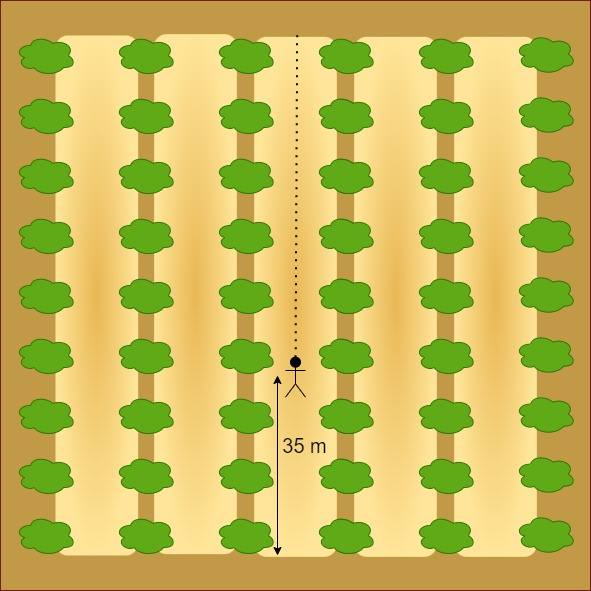

Surco 3 altura 35m

In [ ]:
p = (1,3)                                               # Posición inicial (surco, altura)
s = 5                                                   # Medida del surco en metros 
n_s = 17                                                # Número de surcos
n_v = n_s + 1                                           # Número de vegetación 
xm = s/2; ym = xm                                       # Margenes 
print("La posición es surco ",p[0], 
      " altura ",p[1], " metros")

X_camp = 100; Y_camp = 100                              # Dimensiones del campo en metros
sum_v = X_camp-n_s*s
v = sum_v/n_v
lineasv = []; lineash = []
print("Cada vegetación mide: ",v)
print("Distancia en x de tallo a tallo: ",s+v)

if p[0] == 1:
  posx = (v+xm)
else:
  posx = (v+xm) + (p[0]-1)*(v+(2*xm))
posy = p[1]                         # Posición en campo

La posición es surco  1  altura  3  metros
Cada vegetación mide:  0.8333333333333334
Distancia en x de tallo a tallo:  5.833333333333333


## Trayectoria

<center>

Recorrido en el campo.

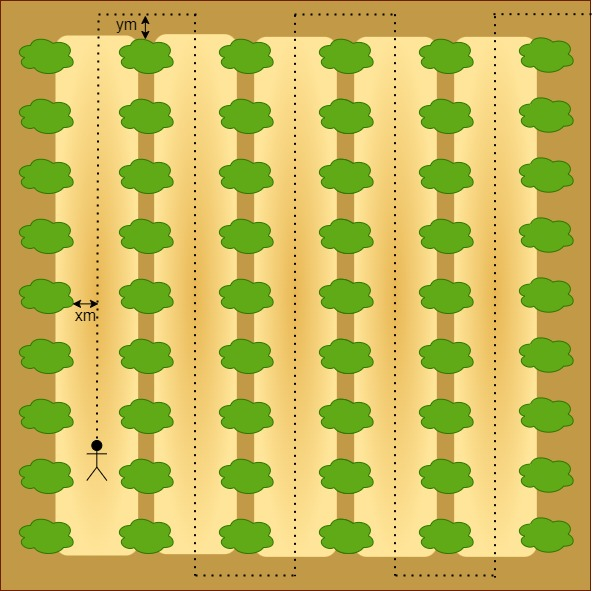

In [ ]:
## Trayectoria  

def trayects(X_camp,Y_camp,xm,ym,posx,posy):
  # Linea vertical
  xv = posx; yv = posy
  plt.vlines(xv,yv,Y_camp-ym,'k')
  lineasv.append(xv); lineash.append(Y_camp-ym)
  plt.hlines(Y_camp-ym,xv,xv+(2*xm)+v,'k')
  xv = xv+(2*xm)+v
  arriba = 0

  while ((xv)<=(X_camp)):
    plt.vlines(xv,ym,Y_camp-ym,'k') 
    lineasv.append(xv)
    if arriba == 1:
      plt.hlines(Y_camp-ym,xv,xv+(2*xm)+v,'k')
      lineash.append(Y_camp-ym)
      arriba = 0
    else: 
      plt.hlines(ym,xv,xv+(2*xm)+v,'k')
      lineash.append(ym)
      arriba = 1
    xv = xv+(2*xm)+v  
  
  return lineasv, lineash

lineas_camp = []
x1 = 0; x2 = x1+v; y1 = 2*ym; y2 = Y_camp-y1
for i in range(n_v):
  lineas_camp.append(x1+(v/2))
  x1 = x1+(v+s); x2 = x1+v

In [ ]:
med_cul = Y_camp-4*ym
print("El cultivo mide: ", med_cul)
#r = v/2
num_arb = 21
esp_arb = 1.5
print("Hay ",num_arb," arboles")
#print("Cada arbol mide: ", v)
num_esp = num_arb-1
#med_esp = (med_cul-(num_arb*v))/num_esp
med_esp = (med_cul-(num_esp*esp_arb))/num_arb
r = med_esp/2
print("El espacio de arboles es: ", med_esp)

xv = lineas_camp[0]
yv = 2*ym


def arboles(num_arb,r,xv,yv,esp_arb,v):
  yv = yv+v/2; a = []; b = []
  theta = np.linspace(0, 2*np.pi, 360)
  for i in range (num_arb):

    a.append(xv)
    b.append(yv)
    yv = yv+(2*r+esp_arb)
  for k in range (len(a)):
    plt.plot(a[k],b[k],'og',markersize = 2*np.pi*r*r)
  
  return a,b

El cultivo mide:  90.0
Hay  21  arboles
El espacio de arboles es:  2.857142857142857


3.3333333333333335
378
El número total de arboles:  378
Los arboles utiles son: 304.0
Los arboles escgoidos son: 30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


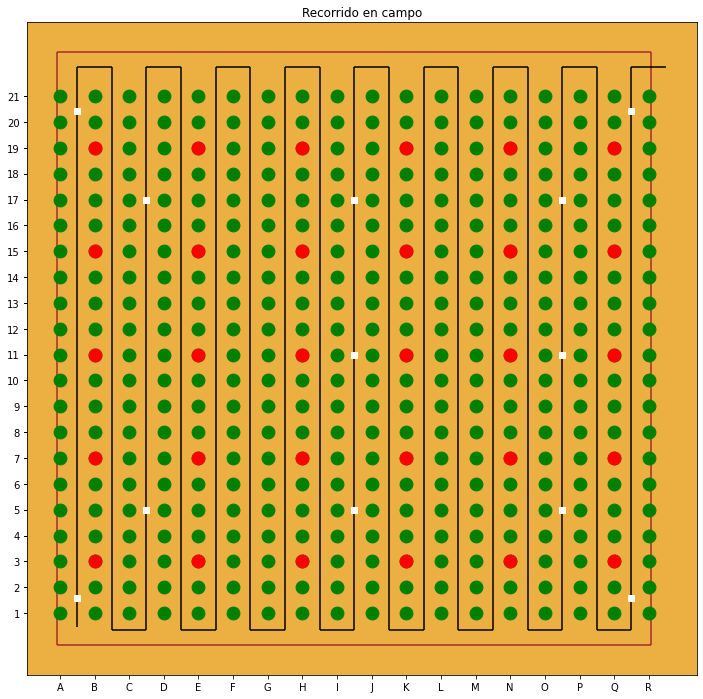

In [ ]:
graficacampo(X_camp,Y_camp,(12,12))
lineasv, lineash = trayects(X_camp,Y_camp,xm,ym,posx,posy)
print(lineasv[0])

## Haciendo los marcadores
## Marcadores extremos
markers_e = (lineasv[0], lineasv[-1])

def markers(x,ymin,ymax):
  
  plt.plot(x,ymin,'sw',markersize = 6,label="Marcadores")
  plt.plot(x,ymax,'sw',markersize = 6,label="Marcadores")

arbolitox = []; arbolitoy = []
for j in range (len(lineas_camp)):
  xv = lineas_camp[j]
  a,b = arboles(num_arb,r,xv,yv,esp_arb,v)
  for k in range (len(a)):
    arbolitox.append(a[k]); arbolitoy.append(b[k])

arb_selx = []; arb_sely = []
print(len(arbolitox))

### Eligiendo árboles al azar
#h = int(len(arbolitox)*0.10)
#arb_selx.append(random.choices(arbolitox, k = 30))
#arb_sely.append(random.choices(arbolitoy,k = 30))
#plt.plot(arb_selx,arb_sely,'or',markersize = 2*np.pi*r*r,label="Arboles a medir")

print("El número total de arboles: ",len(arbolitox))
arb_utiles = ((len(arbolitox)/num_arb)-2)*(num_arb-2)
print("Los arboles utiles son:",arb_utiles)
arb_esc = int(0.10*arb_utiles)
print("Los arboles escgoidos son:",arb_esc)

#if arb_esc<=((len(arbolitox)/num_arb)-2):

## Marcadores externos
for i in (markers_e):
  markers(i,arbolitoy[0]+ym,arbolitoy[-1]-ym)
  markers(i,arbolitoy[0]+ym,arbolitoy[-1]-ym)


## Marcadores int


## ARBOLES
arby = [2,6,10,14,18]
arbx = [1,4,7,10,13,16]

for b in arbx:
  for g in arby:
    plt.plot(arbolitox[num_arb*b],arbolitoy[g],'or',markersize = 2*np.pi*r*r)


posmark = [2,8,14]
ymm = arbolitoy[4]; ymax = arbolitoy[16]

for i in posmark:
  markers(lineasv[i],ymm,ymax)
  markers(lineasv[i],ymm,ymax)

markers(lineasv[8],arbolitoy[10],arbolitoy[10])
markers(lineasv[14],arbolitoy[10],arbolitoy[10])

plt.title("Recorrido en campo")
ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method




ax.set_facecolor("#ebaf42")


letters = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
labels = []

for i in range (int(len(arbolitox)/num_arb)):
  labels.append(letters[i])

labely = []
for i in range (num_arb):
  labely.append(i+1)


plt.xticks(lineas_camp,labels=labels)
plt.yticks(arbolitoy,labels=labely)


plt.show()
#print(arbolitox)






#if num_arb%2 != 0:
  # Tres lineas
  #if (arb_esc/3) <= ((len(arbolitox)/num_arb)-2):
    #if (((len(arbolitox)/num_arb)-2)-(arb_esc/3))%2 == 0:

      #for i in range (0,int(arb_esc/3)):

        #plt.plot(arbolitox[(num_arb*int(((((len(arbolitox)/num_arb)-2)-(arb_esc/3))/2)+1))+i*(num_arb)],arbolitoy[int((num_arb-1)/2)],'or',markersize = 2*np.pi*r*r)
        #plt.plot(arbolitox[(num_arb*int(((((len(arbolitox)/num_arb)-2)-(arb_esc/3))/2)+1))+i*(num_arb)],arbolitoy[int((num_arb-1)/2)+int((((len(arbolitox)/num_arb)-2)-(arb_esc/3))/2)],'or',markersize = 2*np.pi*r*r)
        #plt.plot(arbolitox[(num_arb*int(((((len(arbolitox)/num_arb)-2)-(arb_esc/3))/2)+1))+i*(num_arb)],arbolitoy[int((num_arb-1)/2)-int((((len(arbolitox)/num_arb)-2)-(arb_esc/3))/2)],'or',markersize = 2*np.pi*r*r)

  #for i in range (int(arb_esc/3)):

## Puntos de medición.

In [ ]:
mediciones = 60; copia_mediciones = mediciones
dr1 = int(Y_camp-ym-posy)
npdr1 = dr1/mediciones
#print("numero de puntos primer trayecto: ",npdr1)
pointsx = []; pointsy = []
pposx = posx; pposy = posy
pointsx.append(posx); pointsy.append(posy)

In [ ]:
def p_medicion(pposx,pposy,mediciones,copia_mediciones):
  a = 0; b = 0; d = 0; e = 0; f = 0

  if i == 0 or i%2 == 0:
    #print("linea ",i)
    sig_lineav = lineasv[i] + 2*xm + v
    while ((pposy+mediciones) <= (max(lineash))):
      pointsy.append(pposy+mediciones)
      pointsx.append(lineasv[i])
      mediciones = copia_mediciones + mediciones
      #print("Estamos en: ",pointsx[-1],pointsy[-1])

    c = max(lineash)-pointsy[-1]; 
    mediciones = copia_mediciones
    d = mediciones-c
    pposx = pointsx[-1]; pposy = pointsy[-1]
    #print("Se subió hasta: ",pposx,pposy)
    #print("sobra: ",c)
    #print("d es: ",d," y hay: ",lineasv[2]-lineasv[1]);print(" ")

    if d>0:
      if (pposx+d) <= sig_lineav:
          pointsy.append(max(lineash))
          pointsx.append(pposx+d)
          pposx = pointsx[-1]; pposy = pointsy[-1]
          d = 0
          #print("Estamos arriba en: ",pposx,pposy)
      
          while((pposx+mediciones) <= sig_lineav):
            if (pposx+mediciones) <= X_camp:
              pointsy.append(max(lineash))
              pointsx.append(pposx+mediciones)
              pposx = pointsx[-1]
              #print("HOLA")
              #print("Estamos en: ",pointsx[-1],pointsy[-1])

      elif (pposx+d) > sig_lineav:
          pointsy.append(max(lineash)-((pposx+d)-sig_lineav))
          pointsx.append(sig_lineav)
          pposx = pointsx[-1]; pposy = pointsy[-1]
          d = 0
          #print("Bajamos a: ",pposx,pposy)
      
    e = (sig_lineav)-pointsx[-1]; 
    mediciones = copia_mediciones
    f = mediciones-e
    pposx = pointsx[-1]; pposy = pointsy[-1]
    #print("Terminamos en: ",pposx,pposy)
    #print("sobra: ",e)
    #print("f es: ",f," y hay: ",lineasv[2]-lineasv[1]);print(" ")

    if f>0 and ((pposx+e) == sig_lineav):
      if (pposy-f) >= ym:
          pointsy.append(pposy-f)
          pointsx.append(pposx+e)
          pposx = pposx+e; pposy = pointsy[-1]
          f = 0
          #print("Giramos para bajar a: ",pposx,pposy)

  else:
    #print("linea ",i)
    mediciones = copia_mediciones
    sig_lineav = lineasv[i] + 2*xm + v
    #print("ESTAMOS EN ",pposx,pposy)
    while ((pposy-mediciones) >= (min(lineash))):
      pointsy.append(pposy-mediciones)
      pointsx.append(lineasv[i])
      mediciones = copia_mediciones + mediciones
      #print("Estamos en: ",pointsx[-1],pointsy[-1])

    c = pointsy[-1]-min(lineash); 
    mediciones = copia_mediciones
    d = mediciones-c
    pposx = pointsx[-1]; pposy = pointsy[-1]
    #print("Se bajó hasta: ",pposx,pposy)
    #print("sobra: ",c, "la siguiente linea: ",sig_lineav)
    #print("d es: ",d," y hay: ",lineasv[2]-lineasv[1]);print(" ")

    if d>0:
      if (pposx+d) <= sig_lineav:
          pointsy.append(min(lineash))
          pointsx.append(pposx+d)
          pposx = pointsx[-1]; pposy = pointsy[-1]
          d = 0
          #print("Estamos abajo en: ",pposx,pposy)
      
          while((pposx+mediciones) <= sig_lineav):
            if (pposx+mediciones) <= X_camp:
              pointsy.append(min(lineash))
              pointsx.append(pposx+mediciones)
              pposx = pointsx[-1]
              print("Estamos en: ",pointsx[-1],pointsy[-1])

      elif (pposx+d) > sig_lineav:
          pointsy.append(min(lineash)+((pposx+d)-sig_lineav))
          pointsx.append(sig_lineav)
          pposx = pointsx[-1]; pposy = pointsy[-1]
          d = 0
          #print("Subimos a: ",pposx,pposy)

    e = (sig_lineav)-pointsx[-1]; 
    mediciones = copia_mediciones
    f = mediciones-e
    pposx = pointsx[-1]; pposy = pointsy[-1]
    #print("Terminamos abajo en: ",pposx,pposy)
    #print("sobra: ",e);
    #print("f es: ",f," y hay: ",lineasv[2]-lineasv[1]);print(" ")

    if f>0 and ((pposx+e) == sig_lineav):
      if (pposy+f) <= max(lineash):
          pointsy.append(pposy+f)
          pointsx.append(pposx+e)
          pposx = pposx+e; pposy = pointsy[-1]
          f = 0
      #print("Giramos para bajar a: ",pposx,pposy)

  return pposx,pposy

Text(0.5, 1.0, 'Recorrido en campo y sus mediciones')

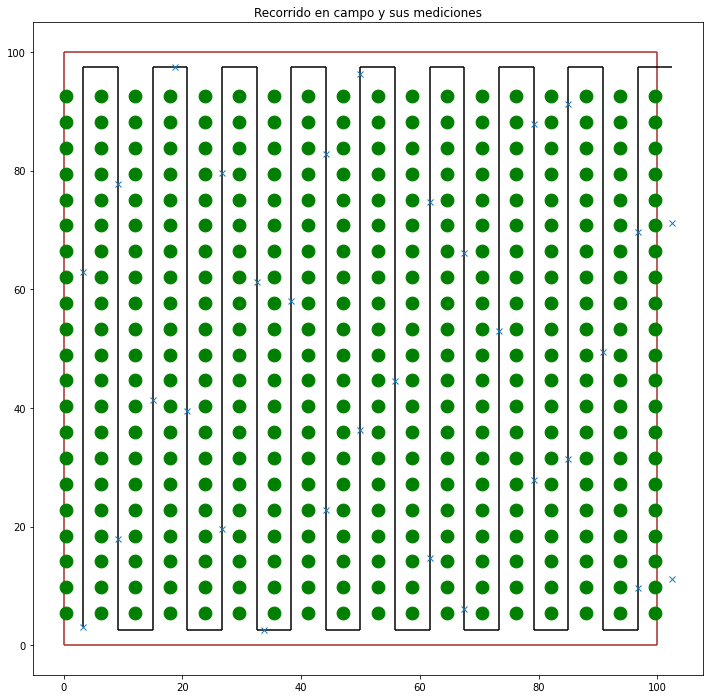

In [ ]:
for i in range(len(lineasv)):
  pposx, pposy = p_medicion(pposx,pposy,mediciones,copia_mediciones)

graficacampo(X_camp,Y_camp,(12,12))
x1 = 0; x2 = x1+v; y1 = 2*ym; y2 = Y_camp-y1
lineasv, lineash = trayects(X_camp,Y_camp,xm,ym,posx,posy)
plt.plot(pointsx,pointsy,'x')
for j in range (len(lineas_camp)):
  xv = lineas_camp[j]
  a,b = arboles(num_arb,r,xv,yv,esp_arb,v)
  for k in range (len(a)):
    arbolitox.append(a[k]); arbolitoy.append(b[k])
plt.title("Recorrido en campo y sus mediciones")



## Mapeo en campo.

In [ ]:
# Anillos.
X = df[:,0]; Y = df[:,1]

In [ ]:
# Calcular puntos______________________________________________

def points(X,Y,pointsx,pointsy):
  xp = []; yp = []

  for i in range(len(pointsx)):
    xp.append(np.array(X) + pointsx[i]);
    yp.append(np.array(Y) + pointsy[i]);

  ## Eliminando puntos
  a = list(xp); dim = len(a[0])
  a = np.array(a).reshape(dim*len(pointsx),1)
  b = list(yp); dim = len(b[0])
  b = np.array(b).reshape(dim*len(pointsx),1)

  ### Encontramos los elementos a eliminar
  erase = []

  for j in range (len(a)):
    if a[j]<0 or a[j]>X_camp:
      erase.append(j)
  for j in range (len(a)):
    if b[j]<0 or b[j]>Y_camp:
      erase.append(j)

  #### Eliminando
  a = np.delete(a,erase)
  b = np.delete(b,erase)
  
  print("Los datos son: ",len(a))
  
  return a,b

Los datos son:  67901


Text(0.5, 1.0, 'Mediciones en campo')

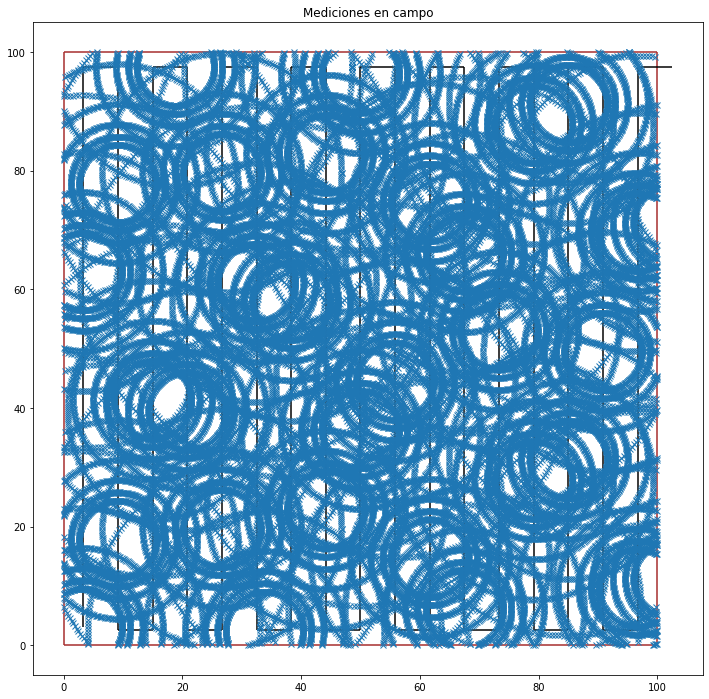

In [ ]:
ah,bh = points(X,Y,pointsx,pointsy)
graficacampo(X_camp,Y_camp,(12,12))
lineasv, lineash = trayects(X_camp,Y_camp,xm,ym,posx,posy)
plt.plot(ah,bh,'x')
plt.title("Mediciones en campo")

# "Funciona"

In [ ]:
med_cul = Y_camp-4*ym
print("El cultivo mide: ", med_cul)
#r = v/2
num_arb = 21
esp_arb = 1.5
print("Hay ",num_arb," arboles")
#print("Cada arbol mide: ", v)
num_esp = num_arb-1
#med_esp = (med_cul-(num_arb*v))/num_esp
med_esp = (med_cul-(num_esp*esp_arb))/num_arb
r = med_esp/2
print("El espacio de arboles es: ", med_esp)
print("Comprobación: ",num_arb*med_esp+num_esp*esp_arb)
print(lineas_camp)

xv = lineas_camp[0]
yv = 2*ym


def arboles(num_arb,r,xv,yv,esp_arb,v):
  yv = yv+v/2; a = []; b = []
  theta = np.linspace(0, 2*np.pi, 360)
  for i in range (num_arb):

    a.append(xv)
    b.append(yv)
    yv = yv+(2*r+esp_arb)
  for k in range (len(a)):
    plt.plot(a[k],b[k],'og',markersize = 2*np.pi*r*r)
  
  return a,b



El cultivo mide:  90.0
Hay  21  arboles
El espacio de arboles es:  2.857142857142857
Comprobación:  90.0
[0.4166666666666667, 6.25, 12.083333333333332, 17.916666666666668, 23.75, 29.583333333333332, 35.416666666666664, 41.25, 47.083333333333336, 52.91666666666667, 58.75000000000001, 64.58333333333334, 70.41666666666667, 76.25, 82.08333333333333, 87.91666666666666, 93.74999999999999, 99.58333333333331]


<Figure size 432x288 with 0 Axes>

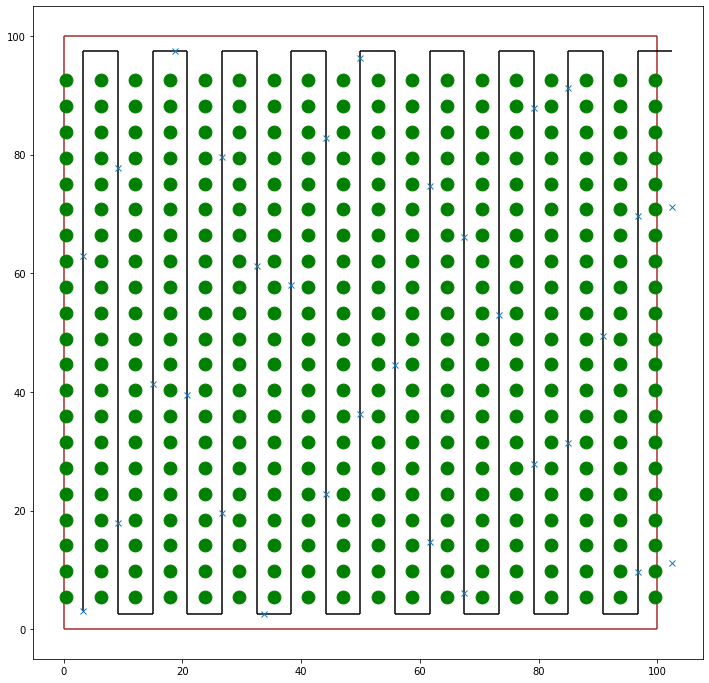

In [ ]:

arbolitox = []; arbolitoy = []
fig = plt.figure()
graficacampo(X_camp,Y_camp,(12,12))
plt.plot(pointsx,pointsy,'x')
lineasv, lineash = trayects(X_camp,Y_camp,xm,ym,posx,posy)
for j in range (len(lineas_camp)):
  xv = lineas_camp[j]
  a,b = arboles(num_arb,r,xv,yv,esp_arb,v)